# Applied Machine Learning

## Frame

Your are startup.ai and you give loans out (non-asset backed loans). You have really high defaults. You are supposed to solve the problem

...

Outcome Variable: 
 - default
 
Demographic Variables
 - age
 - income
 - years
 - ownership
 
Behavioural Variables
 - grade
 - amount

## Acquire

Where do we get from:
- Flat files (csv, tsv) 
- Databases {pandas, sql-alchemy}
- API {requests}
- Scraping {beautiful-soup, scrapy}

Data Size Implication
- Small to Medium (In-Memory) : pandas, modin
- Medium to Large (In-HDD): dask
- Large to Extra-Large (Cluster): spark

Data Fields - Each observation / row is one client
- default: Whether defaulted(1) or not (0)
- amount: Amount lent out to the client
- grade: Equivalent to FICO / CIBIL scores (A>B>C...)
- years: Years of employment / working
- ownership: What type of accomodation they own
- income: income they earn
- age: reported years by them

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
plt.style.use("ggplot")

In [3]:
df = pd.read_csv("data/historical_loan.csv")

In [4]:
df.head()

,default,amount,grade,years,ownership,income,age
0,0,1000,B,2.0,RENT,19200.0,24
1,1,6500,A,2.0,MORTGAGE,66000.0,28
2,0,2400,A,2.0,RENT,60000.0,36
3,0,10000,C,3.0,RENT,62000.0,24
4,1,4000,C,2.0,RENT,20000.0,28


# Refine

- Missing Values
- Quality Check
- Outliers
- Standardize e.g. Bengaluru & Bangalore

In [6]:
# Missing Values
df.isnull().sum()

default        0
amount         0
grade          0
years        279
ownership      0
income         0
age            0
dtype: int64

Missing Value Treatment

1. REMOVE THE Column OR Rows
2. Statistical IMPUTE: Measure: Mean, Median and Mode
    - Nominal, Ordinal: Mode, Create New Category
    - Ratio: Median, Mean
    - Interval: Last Known or Next Value
3. Domain Specific or Fixed Number: 9999
4. BINNING: Convert to CATEGORICAL
5. MODEL: Nearest Neighbour
      

In [7]:
df.years = df.years.fillna(np.mean(df.years))

In [10]:
df.years.mean()

6.0863319011815245

In [9]:
df.years.unique()

array([ 2.       ,  3.       ,  1.       ,  6.       ,  4.       ,
        0.       , 16.       , 12.       , 11.       , 15.       ,
        6.0863319, 18.       ,  8.       ,  7.       , 34.       ,
        9.       , 14.       ,  5.       , 10.       , 20.       ,
       26.       , 19.       , 24.       , 61.       , 27.       ,
       21.       , 13.       , 30.       , 23.       , 22.       ,
       31.       , 25.       , 17.       , 38.       , 28.       ,
       29.       , 56.       , 47.       , 45.       , 43.       ,
       32.       , 33.       , 36.       , 40.       , 44.       ,
       53.       , 41.       , 55.       , 62.       , 48.       ,
       37.       , 35.       ])

## EXPLORE

Class Balance
- Balanced (60/40, 70/30) - Normal Classification Process
- UnBalanced (90/10. 95/5)
   - `class_weight` hyper parameter
   - {sklearn-unbalanced}
- Anomaly Detection/ Severely Unbalanced (99.9 /0.01)
   - PCA-based Techniques
   - ...

#### Single Variable Vis

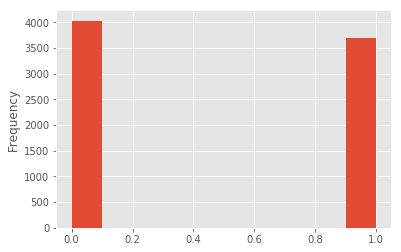

In [12]:
df.default.plot.hist();

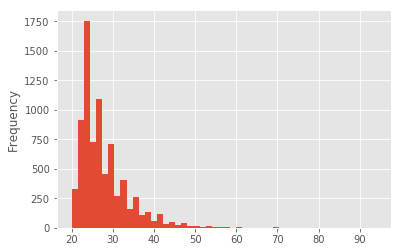

In [17]:
df.age.plot.hist(bins = 50);

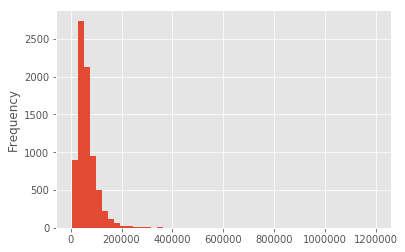

In [18]:
df.income.plot.hist(bins = 50);

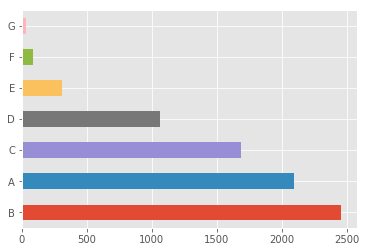

In [30]:
df.grade.value_counts().plot.barh();

### Dual / Triple Variable Exploration

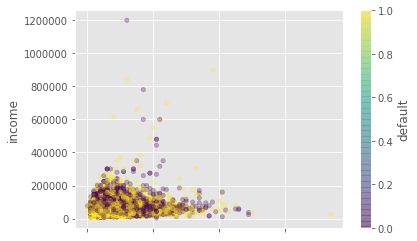

In [24]:
df.plot.scatter(x="age", y="income", c="default", alpha=0.3, cmap="viridis");

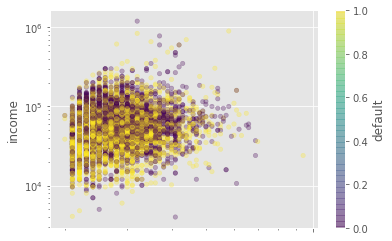

In [25]:
df.plot.scatter(x="age", y="income", c="default", alpha=0.3, cmap="viridis",
               logx=True, logy=True);

## TRANSFORM

- Encoding:
    - Label Encoding: Can work for Ordinal (but not nominal)
    - One-Hot Encoding: Can work for both but sparsity needs to be handled
- Normalisation
    - Standard Scaler
    - Normalizer
- Feature Creation

In [36]:
dfX = df.copy()

In [31]:
df.head()

,default,amount,grade,years,ownership,income,age
0,0,1000,B,2.0,RENT,19200.0,24
1,1,6500,A,2.0,MORTGAGE,66000.0,28
2,0,2400,A,2.0,RENT,60000.0,36
3,0,10000,C,3.0,RENT,62000.0,24
4,1,4000,C,2.0,RENT,20000.0,28


### Encoding

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
le_grade = LabelEncoder()
le_ownership = LabelEncoder()

In [35]:
# Fit the label encoder
le_grade.fit(df.grade)
le_ownership.fit(df.ownership)

LabelEncoder()

In [38]:
dfX["grade"] = le_grade.transform(df.grade)
dfX["ownership"] = le_ownership.transform(df.ownership)

In [41]:
le_grade.classes_, le_ownership.classes_

(array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object),
 array(['MORTGAGE', 'OTHER', 'OWN', 'RENT'], dtype=object))

### Transformation

In [48]:
# Transform - Log
dfX["income"] = np.log(df.income)
dfX["amount"] = np.log(df.amount)
dfX["age"] = np.log(df.age)

In [51]:
dfX.head()

,default,amount,grade,years,ownership,income,age
0,0,6.907755,1,2.0,3,9.862666,3.178054
1,1,8.779557,0,2.0,0,11.097410,3.332205
2,0,7.783224,0,2.0,3,11.002100,3.583519
3,0,9.210340,2,3.0,3,11.034890,3.178054
4,1,8.294050,2,2.0,3,9.903488,3.332205


## MODEL

In [55]:
# Create our X and y

In [57]:
X = dfX.iloc[:,1:7 ]
y = dfX.default

### Model Creation

In [59]:
# Build a model - Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [60]:
dt = DecisionTreeClassifier(max_depth=10)

In [65]:
dt.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

array([[0.58333333, 0.41666667],
       [0.82838284, 0.17161716],
       [1.        , 0.        ],
       ...,
       [0.51282051, 0.48717949],
       [0.2       , 0.8       ],
       [0.34058899, 0.65941101]])

In [152]:
def pred_df(clf, X, y):
    y_pred = clf.predict(X)
    y_pred_proba = clf.predict_proba(X)[:,1]
    pred_df = pd.DataFrame({
        "actual": y,
        "predicted": y_pred,
        "probability": y_pred_proba
    })
    return pred_df

In [153]:
dt_pred = pred_df(dt, X, y)
dt_pred.head()

,actual,predicted,probability
0,0,0,0.416667
1,1,0,0.171617
2,0,0,0.000000
3,0,1,0.602484
4,1,1,0.547368


### Metrics

In [76]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

In [78]:
dt_pred.head()

,actual,predicted,probability
0,0,0,0.416667
1,1,0,0.171617
2,0,0,0.000000
3,0,1,0.602484
4,1,1,0.547368


In [79]:
pd.crosstab(dt_pred.predicted, dt_pred.actual)

actual,0,1
predicted,,
0,3104,1022
1,926,2675


In [90]:
def plot_predictions(pred_df):
    pred_df_0 = pred_df[pred_df.actual == 0].copy()
    pred_df_1 = pred_df[pred_df.actual == 1].copy()
    sns.kdeplot(pred_df_0.probability, shade = True, label = "no default")
    sns.kdeplot(pred_df_1.probability, shade = True, label = "default")

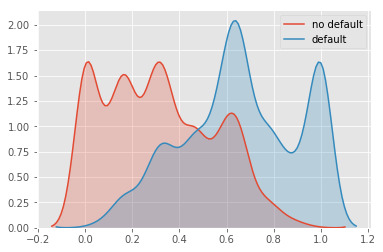

In [91]:
plot_predictions(dt_pred)

In [95]:
def plot_roc_auc(pred_df):
    fpr, tpr, threshold = roc_curve(pred_df.actual, pred_df.probability)
    auc_score = roc_auc_score(pred_df.actual, pred_df.probability)
    plt.plot(fpr, tpr, label="AUC = %0.2f" % auc_score)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc = "lower right")
    return print("AUC = %0.2f" % auc_score)

AUC = 0.84


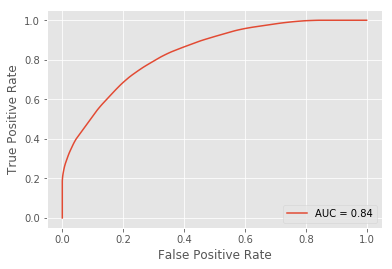

In [96]:
plot_roc_auc(dt_pred)

### Model Evaluation

In [97]:
from sklearn.model_selection import cross_val_score

In [104]:
scores = cross_val_score(dt, X, y, scoring ="roc_auc", cv=5)

In [105]:
np.mean(scores)

0.6570293890343871

### Validation Curve

In [106]:
from sklearn.model_selection import validation_curve

In [112]:
param_range = np.arange(2,20)

In [128]:
train_score, val_score = validation_curve(dt, X, y, "max_depth",
                        param_range=param_range, 
                 cv=5, scoring="roc_auc")

In [133]:
df_val_curve = pd.DataFrame({
    "param": param_range,
    "train_score": np.mean(train_score, axis=1),
    "val_score": np.mean(val_score, axis=1)
})
df_val_curve.index = df_val_curve.param

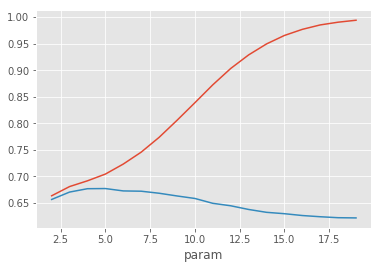

In [137]:
df_val_curve.train_score.plot()
df_val_curve.val_score.plot();

In [139]:
from sklearn.ensemble import RandomForestClassifier

In [144]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)

In [145]:
rf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [146]:
scores = cross_val_score(rf, X, y, scoring ="roc_auc", cv=5)

In [147]:
np.mean(scores)

0.7421444365572218

/Users/amitkaps/miniconda3/envs/workshop/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


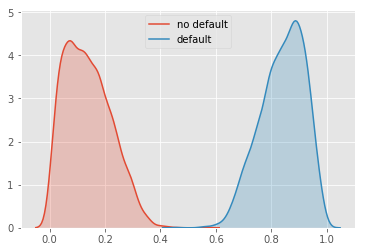

In [154]:
rf_pred = pred_df(rf, X, y)
plot_predictions(rf_pred)

AUC = 1.00


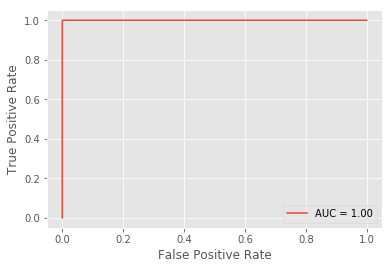

In [155]:
plot_roc_auc(rf_pred)

## Make a Prediction

In [174]:
# Prediction function 

def predict(amount, grade, years, ownership, income, age):
    """
    Given these inputs, return the probability to default
    """
    
    # Encoders work on a vector. Wrap to make it work
    ownership_code = le_ownership.transform([ownership])[0]
    grade_code = le_grade.transform([grade])[0]
    
    # Transform age, income and amount
    age_feature = np.log(age)
    income_feature = np.log(income)
    amount_feature = np.log(amount)
    
    # Create feature array
    features = [amount_feature, grade_code, years, ownership_code, income_feature,
              age_feature]
    
    # Get the probabilities
    p0, p1 = rf.predict_proba([features])[0]
    
    return p1

In [175]:
df.iloc[0,:].values

array([0, 1000, 'B', 2.0, 'RENT', 19200.0, 24], dtype=object)

In [203]:
predict(amount = 1000, 
        grade = 'B', 
        years = 2.0, 
        ownership = 'RENT', 
        income = 19200.0, 
        age = 24)

0.21

In [183]:
rf.predict_proba([X.iloc[0,:]])

array([[0.79, 0.21]])

## Deploy my Model

- Serialise my model 
- Serve the model

### Serialize the object

In [157]:
from sklearn.externals import joblib

In [213]:
joblib.dump(rf, "model.pkl")
joblib.dump(le_ownership, "encOwn.pkl")
joblib.dump(le_grade, "encGrade.pkl")

['encGrade.pkl']

In [214]:
%%file credit.py

"""Service to predict the probability of a person to default a loan.
How to use:
    firefly credit.predict
"""

# Prediction function for the server

import os
import numpy as np
from sklearn.externals import joblib

# read the encoders and the model
le_grade = joblib.load("encGrade.pkl")
le_ownership = joblib.load("encOwn.pkl")
model = joblib.load("model.pkl")

def predict(amount, grade, years, ownership, income, age):
    """
    Given these inputs, return the probability to default
    """
    
    # Encoders work on a vector. Wrap to make it work
    ownership_code = le_ownership.transform([ownership])[0]
    grade_code = le_grade.transform([grade])[0]
    
    # Transform age, income and amount
    age_feature = np.log(age)
    income_feature = np.log(income)
    amount_feature = np.log(amount)
    
    # Create feature array
    features = [amount_feature, grade_code, years, ownership_code, income_feature,
              age_feature]
    
    # Get the probabilities
    p0, p1 = model.predict_proba([features])[0]
    
    return p1

Overwriting credit.py


### Serve the Predict Function

Run this in the terminal

```
pip install firefly-python
```

In [215]:
import firefly

Run this in the terminal

```
 firefly credit.predict

```

In [216]:
client = firefly.Client("http://127.0.0.1:8000/")

In [217]:
client.predict(amount = 1000, 
        grade = 'B', 
        years = 2.0, 
        ownership = 'RENT', 
        income = 19200.0, 
        age = 24)

0.21